In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/music-streaming-customer-churn-competition/kaggle_data_20250310/sample_submission.csv
/kaggle/input/music-streaming-customer-churn-competition/kaggle_data_20250310/train.csv
/kaggle/input/music-streaming-customer-churn-competition/kaggle_data_20250310/test.csv


**1. Load the dataset**

In [2]:
# use pandas to load your data to dataframe objects
import pandas as pd

# load the training, testing, and sample submission data
training_data = pd.read_csv(r'/kaggle/input/music-streaming-customer-churn-competition/kaggle_data_20250310/train.csv')
testing_data = pd.read_csv(r'/kaggle/input/music-streaming-customer-churn-competition/kaggle_data_20250310/test.csv')
sample_submission = pd.read_csv(r'/kaggle/input/music-streaming-customer-churn-competition/kaggle_data_20250310/sample_submission.csv')

In [3]:
#Verify the loaded dataset
for dataset in [training_data, testing_data, sample_submission]:
    print(f"dataset shape: {dataset.shape}")

dataset shape: (41000, 20)
dataset shape: (9999, 19)
dataset shape: (7, 2)


In [4]:
#Verifying the loaded dataset with some samples
training_data.head()

,customer_id,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,signup_date,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,churned
0,1,72,Washington,family premium,monthly,monthly,venmo,many,4/8/2014,17.953071,2.453398,0.04,245,151,35,57,14,7,0,0
1,2,48,New York,family premium,annual,monthly,credit,none,12/10/2015,7.725493,0.924008,0.98,112,57,18,62,10,3,1,0
2,3,76,West Virginia,family premium,annual,annual,credit,few,4/22/2014,9.514800,1.563817,0.35,124,96,15,34,17,6,1,0
3,4,80,Georgia,family premium,annual,annual,debit,few,8/31/2013,8.497869,1.089721,0.69,130,109,13,42,8,4,0,0
4,5,39,New Jersey,family premium,annual,annual,debit,many,1/14/2013,29.971731,2.313365,0.76,490,293,54,90,14,5,0,0


In [5]:
#Verifying the loaded dataset with some samples
testing_data.head()

,customer_id,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,signup_date,weekly_hours,average_session_length,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked
0,41001,54,South Carolina,family premium,annual,monthly,credit,some,10/16/2015,13.893952,1.239548,0.16,168,95,17,67,21,7,0
1,41002,54,Idaho,premium,monthly,monthly,debit,few,2/14/2016,20.846052,2.174727,0.54,286,150,32,56,7,4,65
2,41003,55,Maine,basic,annual,monthly,venmo,some,5/29/2018,15.448902,1.054629,0.49,214,194,21,52,8,4,155
3,41004,59,Washington,premium,monthly,monthly,debit,many,9/10/2016,5.980224,0.329190,0.27,85,61,16,62,12,3,222
4,41005,58,Georgia,family premium,annual,annual,credit,none,3/27/2020,22.112438,1.695844,0.61,325,234,42,62,11,4,2


In [6]:
#Verifying the loaded dataset with some samples
sample_submission.head()

,customer_id,churned
0,41001,1
1,41002,1
2,41003,0
3,41004,0
4,41005,1


In [7]:
# verify the data was loaded
for dataset in [training_data, testing_data, sample_submission]:
    print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41000 entries, 0 to 40999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 41000 non-null  int64  
 1   age                         41000 non-null  int64  
 2   location                    41000 non-null  object 
 3   subscription_type           41000 non-null  object 
 4   payment_plan                41000 non-null  object 
 5   num_subscription_pauses     41000 non-null  object 
 6   payment_method              41000 non-null  object 
 7   customer_service_inquiries  41000 non-null  object 
 8   signup_date                 41000 non-null  object 
 9   weekly_hours                41000 non-null  float64
 10  average_session_length      41000 non-null  float64
 11  song_skip_rate              41000 non-null  float64
 12  weekly_songs_played         41000 non-null  int64  
 13  weekly_unique_songs         410

In [8]:
training_data.columns

Index(['customer_id', 'age', 'location', 'subscription_type', 'payment_plan',
       'num_subscription_pauses', 'payment_method',
       'customer_service_inquiries', 'signup_date', 'weekly_hours',
       'average_session_length', 'song_skip_rate', 'weekly_songs_played',
       'weekly_unique_songs', 'num_favorite_artists', 'num_platform_friends',
       'num_playlists_created', 'num_shared_playlists',
       'notifications_clicked', 'churned'],
      dtype='object')

**2. Clean the data**

In [9]:
# verify the data for missing values
for dataset_name, dataset in zip(["Training Data", "Testing Data", "Sample Submission"], 
                                 [training_data, testing_data, sample_submission]):
    
    print(f"\n🔹 {dataset_name} - Missing Values:")
    print(dataset.isnull().sum()) 


🔹 Training Data - Missing Values:
customer_id                   0
age                           0
location                      0
subscription_type             0
payment_plan                  0
num_subscription_pauses       0
payment_method                0
customer_service_inquiries    0
signup_date                   0
weekly_hours                  0
average_session_length        0
song_skip_rate                0
weekly_songs_played           0
weekly_unique_songs           0
num_favorite_artists          0
num_platform_friends          0
num_playlists_created         0
num_shared_playlists          0
notifications_clicked         0
churned                       0
dtype: int64

🔹 Testing Data - Missing Values:
customer_id                   0
age                           0
location                      0
subscription_type             0
payment_plan                  0
num_subscription_pauses       0
payment_method                0
customer_service_inquiries    0
signup_date           

In [10]:
columns_to_drop = ['customer_id', 'signup_date', 'location', 'payment_method', 'num_subscription_pauses']
training_data = training_data.drop(columns=columns_to_drop)


In [11]:
training_data.columns

Index(['age', 'subscription_type', 'payment_plan',
       'customer_service_inquiries', 'weekly_hours', 'average_session_length',
       'song_skip_rate', 'weekly_songs_played', 'weekly_unique_songs',
       'num_favorite_artists', 'num_platform_friends', 'num_playlists_created',
       'num_shared_playlists', 'notifications_clicked', 'churned'],
      dtype='object')

**3. Data Profiling**

In [12]:
# data profiling function
def create_data_profiling_df(data: pd.DataFrame) -> pd.DataFrame:

    # create an empty dataframe to gather information about each column
    data_profiling_df = pd.DataFrame(columns = ["column_name",
                                                "data_type",
                                                "values",
                                                "null_values",
                                                "percent_null",
                                                "unique_values",
                                                "duplicate_values",
                                                "min",
                                                "max",
                                                "median",
                                                "stdev",
                                                "IQR",
                                                "skewness",
                                                "most_common_value",
                                                "outliers"])

    # loop through each column to add rows to the data_profiling_df dataframe
    for column in data.columns:

        # create an empty dictionary to store the columns data
        column_dict = {}

        try:
            column_dict["column_name"] = [column]
            column_dict["data_type"] = [data[column].dtypes]
            column_dict["values"] = [data[column].notnull().sum()]
            column_dict["null_values"] = [data[column].isna().sum()]
            column_dict["percent_null"] = [round(data[column].isna().sum() / len(data[column]), 2)]
            column_dict["unique_values"] = [len(data[column].unique())]
            column_dict["duplicate_values"] = [(data[column].notnull().sum()) - len(data[column].unique())]
            column_dict["min"] = [data[column].min() if (data[column].dtypes != object) else "NA"]
            column_dict["max"] = [round(data[column].max(), 1) if (data[column].dtypes != object) else "NA"]
            column_dict["mean"] = [round(data[column].mean(), 1) if (data[column].dtypes != object) else "NA"]
            column_dict["median"] = [round(data[column].median(), 1) if (data[column].dtypes != object) else "NA"]
            column_dict["stdev"] = [round(data[column].std(), 1) if (data[column].dtypes != object) else "NA"]
            column_dict["IQR"] = [round(data[column].quantile(.75), 1) - data[column].quantile(.25) if (data[column].dtypes != object) else "NA"]
            column_dict["most_common_value"] = data[column].mode().iloc[0] if not data[column].mode().empty else "NA"
            column_dict["skewness"] = [data[column].skew(skipna=True) if (data[column].dtypes != object) else "NA"]

            # calculate likely outliers
            if data[column].dtypes != object:
                Q1 = data[column].quantile(0.25)
                Q3 = data[column].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
                column_dict["outliers"] = len(outliers)
            else:
                column_dict["outliers"] = "NA"

        except:
            print(f"unable to read column: {column}, you may want to drop this column")

        # add the information from the columns dict to the final dataframe
        data_profiling_df = pd.concat([data_profiling_df, pd.DataFrame(column_dict)],
                                      ignore_index = True)

    # sort the final dataframe by unique values descending
    data_profiling_df.sort_values(by = ['unique_values'],
                                  ascending = [False],
                                  inplace=True)

    # print the function is complete
    print(f"data profiling complete, dataframe contains {len(data_profiling_df)} columns")
    return data_profiling_df

In [13]:
# run the data profiling function
data_profiling_df = create_data_profiling_df(data = training_data)

# print the dataframe
data_profiling_df

<ipython-input-12-148ed7339d30>:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_profiling_df = pd.concat([data_profiling_df, pd.DataFrame(column_dict)],


data profiling complete, dataframe contains 15 columns


,column_name,data_type,values,null_values,percent_null,unique_values,duplicate_values,min,max,median,stdev,IQR,skewness,most_common_value,outliers,mean
4,weekly_hours,float64,41000,0,0.0,41000,0,0.000013,31.0,15.4,9.0,15.619053,0.008971,0.000013,0,15.4
5,average_session_length,float64,41000,0,0.0,41000,0,0.000455,5.1,1.2,1.1,1.389075,0.917565,0.000455,717,1.5
7,weekly_songs_played,int64,41000,0,0.0,613,40387,0,615,231.0,143.9,234.0,0.223306,8,0,236.2
8,weekly_unique_songs,int64,41000,0,0.0,554,40446,0,583,153.0,107.1,159.0,0.559891,4,227,163.8
13,notifications_clicked,int64,41000,0,0.0,418,40582,0,445,49.0,75.6,97.0,1.538503,1,1528,65.4
10,num_platform_friends,int64,41000,0,0.0,109,40891,10,118,64.0,21.8,34.0,-0.001307,57,0,63.8
6,song_skip_rate,float64,41000,0,0.0,101,40899,0.0,1.0,0.3,0.3,0.33,0.665077,0.34,106,0.4
9,num_favorite_artists,int64,41000,0,0.0,72,40928,0,71,28.0,14.7,24.0,0.200533,23,0,28.7
0,age,int64,41000,0,0.0,69,40931,18,86,52.0,19.9,34.0,-0.004195,81,0,52.0
12,num_shared_playlists,int64,41000,0,0.0,21,40979,1,21,5.0,4.3,5.0,1.41876,3,2000,6.3


**4. EDA**

In [14]:
# import needed libraries
import matplotlib.pyplot as plt
import seaborn as sns

# define function to plot histogram and identify outliers
def plot_histogram(df: pd.DataFrame,
                   variable: str,
                   bins=10,
                   color='grey',
                   edgecolor='black',
                   figsize=(7, 2),
                   iqr_on = False):

    # set the figure size
    plt.figure(figsize=figsize)

    # plot the histogram
    plt.hist(df[variable],
             bins=bins,
             color=color,
             edgecolor=edgecolor)

    # customize the plot labels and colors
    plt.title(f'{variable} Histogram')
    plt.xlabel(f'{variable}')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.ticklabel_format(style='plain', axis='x')
    plt.grid(True)

    # define the Inter Quartile Range (iqr) and outlier bounds
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1
    if iqr_on == True:
      lower_bound = q1
      upper_bound = q3
    else:
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr

    # mark the outlier boundson the histogram
    plt.axvline(lower_bound, color='blue', linestyle='dashed', linewidth=2, label='Lower Bound')
    plt.axvline(upper_bound, color='blue', linestyle='dashed', linewidth=2, label='Upper Bound')

    # Show the plot
    plt.legend()
    plt.show()

    # count the outliers
    num_outliers = ((df[variable] < lower_bound) | (df[variable] > upper_bound)).sum()

    # print information about outliers
    if num_outliers > 0:
        print(f"{num_outliers} potential outliers detected in {variable} distribution")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    else:
        print(f"no potential outliers detected in {variable} distribution")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # print a new line
    print("""
          -----
          """)


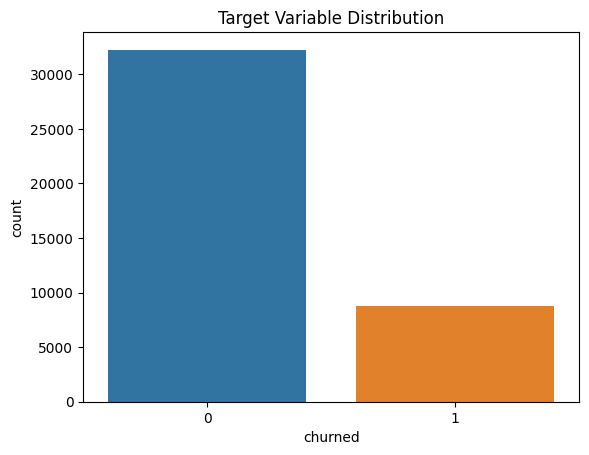

In [15]:
# Exploratory Data Analysis (EDA)
sns.countplot(x='churned', data=training_data)
plt.title("Target Variable Distribution")
plt.show()

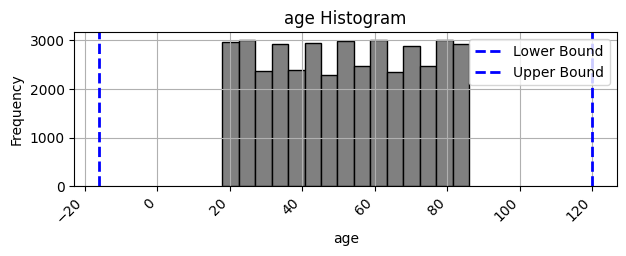

no potential outliers detected in age distribution
Lower Bound: -16.0, Upper Bound: 120.0

          -----
          


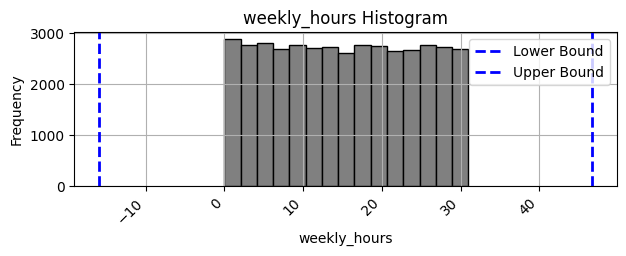

no potential outliers detected in weekly_hours distribution
Lower Bound: -15.908200463124995, Upper Bound: 46.72952588587499

          -----
          


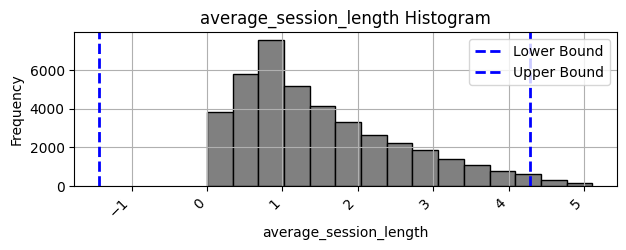

717 potential outliers detected in average_session_length distribution
Lower Bound: -1.4312513930000001, Upper Bound: 4.281220145000001

          -----
          


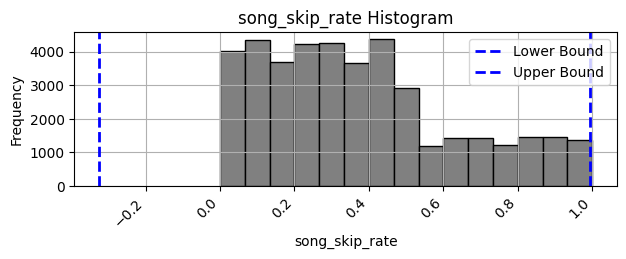

106 potential outliers detected in song_skip_rate distribution
Lower Bound: -0.32499999999999996, Upper Bound: 0.9949999999999999

          -----
          


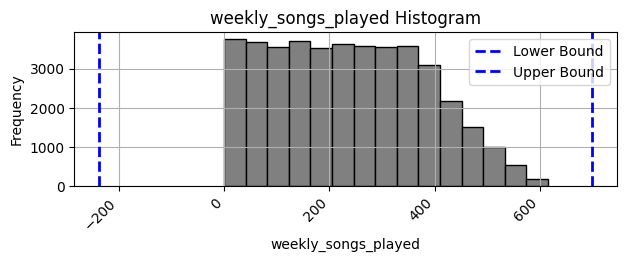

no potential outliers detected in weekly_songs_played distribution
Lower Bound: -237.0, Upper Bound: 699.0

          -----
          


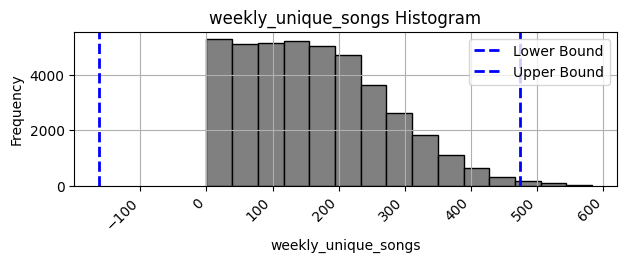

227 potential outliers detected in weekly_unique_songs distribution
Lower Bound: -162.5, Upper Bound: 473.5

          -----
          


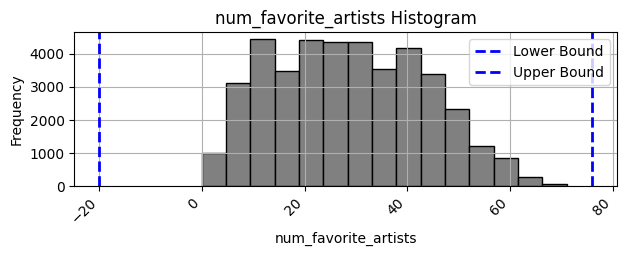

no potential outliers detected in num_favorite_artists distribution
Lower Bound: -20.0, Upper Bound: 76.0

          -----
          


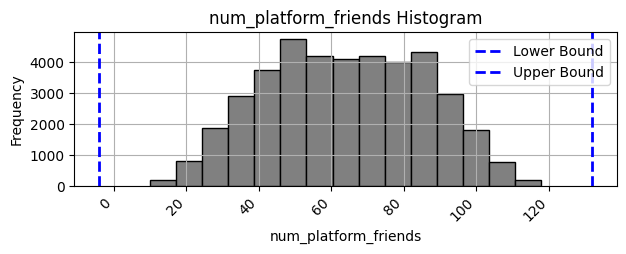

no potential outliers detected in num_platform_friends distribution
Lower Bound: -4.0, Upper Bound: 132.0

          -----
          


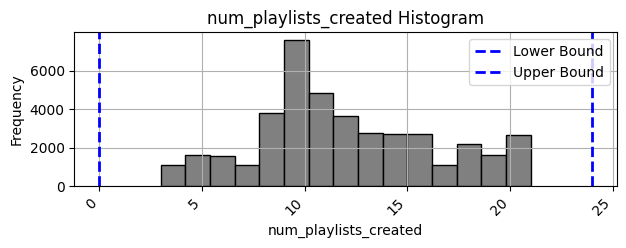

no potential outliers detected in num_playlists_created distribution
Lower Bound: 0.0, Upper Bound: 24.0

          -----
          


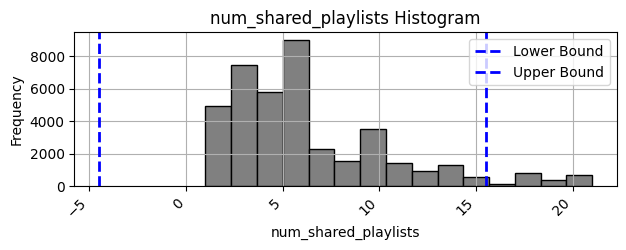

2000 potential outliers detected in num_shared_playlists distribution
Lower Bound: -4.5, Upper Bound: 15.5

          -----
          


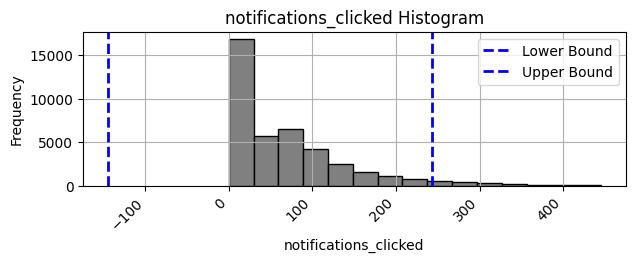

1528 potential outliers detected in notifications_clicked distribution
Lower Bound: -144.5, Upper Bound: 243.5

          -----
          


In [16]:
# Run the histogram function on appropriate numerical features
# List of numerical features from your dataset
numerical_features = [
    "age", "weekly_hours", "average_session_length", "song_skip_rate", 
    "weekly_songs_played", "weekly_unique_songs", "num_favorite_artists", 
    "num_platform_friends", "num_playlists_created", "num_shared_playlists", 
    "notifications_clicked"
]
for feature in numerical_features:
    plot_histogram(df=training_data, variable=feature, bins=15)

In [17]:
# create a function to make a bar chart of the count of categorical variables
def count_plot(df: pd.DataFrame,
               variable: str):

    plt.figure(figsize=(10, 5))
    sns.countplot(data = df,
                  x = f"{variable}",
                  color = "grey")
    plt.title(f'Count of {variable}')
    plt.xlabel(f'{variable}')
    plt.ylabel('count')
    plt.show()
    print("""
    -----
    """)

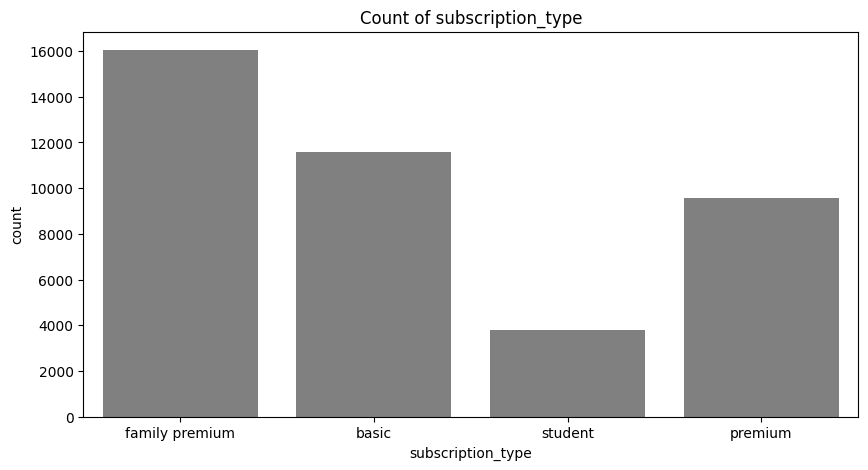


    -----
    


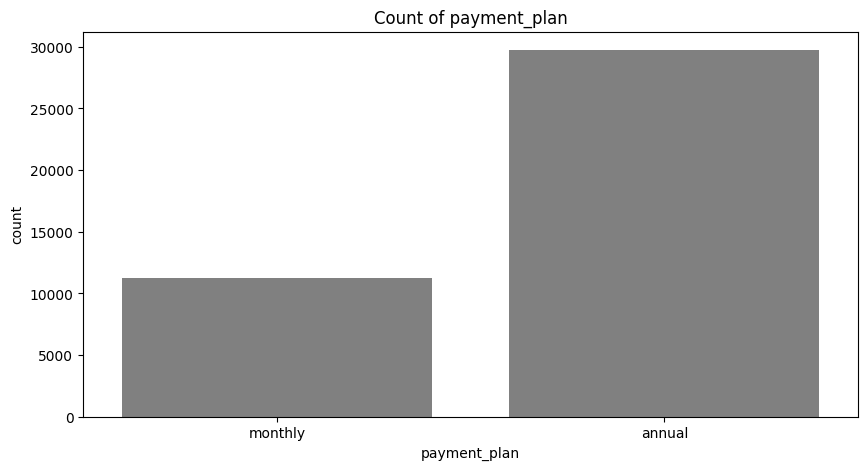


    -----
    


In [18]:
# Updated list of categorical features (excluding dropped columns)
categorical_features = ["subscription_type", "payment_plan"]

# Generate count plots for remaining categorical features
for feature in categorical_features:
    count_plot(df=training_data, variable=feature)


**5. Set up Data Transformation**

In [19]:
import numpy as np
import pandas as pd

# Function to log transform any column
def log_transform_column(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Log transform a column (if not null) with a log(x+1) transformation.
    """
    df = df.copy()
    df[column] = df[column].apply(lambda x: np.log(x + 1) if pd.notnull(x) and x > 0 else x)
    return df

# Function to normalize a numerical column (e.g., for feature scaling)
def normalize_column(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Normalize a column using min-max scaling.
    """
    df = df.copy()
    min_val = df[column].min()
    max_val = df[column].max()
    df[column] = (df[column] - min_val) / (max_val - min_val)
    return df

# Function to encode categorical columns using one-hot encoding
def one_hot_encode_column(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Apply one-hot encoding to categorical columns.
    """
    df = df.copy()
    df = pd.get_dummies(df, columns=[column], drop_first=True)  # drop_first=True avoids multicollinearity
    return df

# Apply transformations to your dataset

# Log transform columns that may benefit from it (numerical features with a wide range or skewed distribution)
columns_to_log_transform = [
    'weekly_hours', 'average_session_length', 'song_skip_rate', 
    'weekly_songs_played', 'weekly_unique_songs', 'num_favorite_artists', 
    'num_platform_friends', 'num_playlists_created', 'num_shared_playlists', 
    'notifications_clicked'
]
for column in columns_to_log_transform:
    training_data = log_transform_column(training_data, column)

# Normalize numerical columns (for scaling)
columns_to_normalize = columns_to_log_transform  # Same columns as log transformation
for column in columns_to_normalize:
    training_data = normalize_column(training_data, column)

# One-hot encode categorical columns (after dropping unnecessary ones)
categorical_columns = ['subscription_type', 'payment_plan', 'customer_service_inquiries']
for column in categorical_columns:
    training_data = one_hot_encode_column(training_data, column)

# Ensure the target column 'churned' is treated properly for classification (binary target)
training_data['churned'] = training_data['churned'].astype(int)  # Ensure it's an integer column for classification

# Print first few rows to check
print(training_data.head(5))


   age  weekly_hours  average_session_length  song_skip_rate  \
0   72      0.848891                0.684739        0.056584   
1   48      0.625060                0.361439        0.985500   
2   76      0.678884                0.520111        0.432959   
3   80      0.649534                0.407103        0.757023   
4   39      0.990598                0.661860        0.815575   

   weekly_songs_played  weekly_unique_songs  num_favorite_artists  \
0             0.857095             0.788691              0.837923   
1             0.735981             0.637442              0.688489   
2             0.751694             0.718176              0.648306   
3             0.758993             0.737920              0.617083   
4             0.964690             0.892256              0.937023   

   num_platform_friends  num_playlists_created  num_shared_playlists  \
0              0.698189               0.775338              0.578130   
1              0.732916               0.593402          

**6. Feature Engineering**

In [20]:
plotting_df = training_data.copy()

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot the influence of a new feature on churn rate
def plot_new_feature(df: pd.DataFrame, new_feature_name: str, legend_loc='upper right'):
    """
    Plot the influence of a new feature on the churn rate (target column: 'churned').

    Parameters:
    - df (pd.DataFrame): The dataframe containing the data.
    - new_feature_name (str): The name of the new feature to analyze.
    - legend_loc (str): Location of the legend on the plot (default is 'upper right').
    """
    # Copy the original dataframe to avoid modifying the original data
    plot_df = df.copy()

    # Ensure the target column 'churned' is present and binary
    if 'churned' not in plot_df.columns:
        raise ValueError("The target column 'churned' is not present in the dataframe.")

    # Calculate the churn rate (mean of 'churned') for each unique value of the new feature
    feature_churn_rate = plot_df.groupby(new_feature_name)['churned'].mean().reset_index()

    # Sort by churn rate (highest first)
    feature_churn_rate = feature_churn_rate.sort_values(by='churned', ascending=False)

    # Calculate the overall average churn rate
    average_churn_rate = plot_df['churned'].mean()

    # Plot the data using seaborn barplot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=new_feature_name, y='churned', data=feature_churn_rate, color='grey', 
                order=feature_churn_rate[new_feature_name])

    # Add a horizontal line for the overall average churn rate
    plt.axhline(average_churn_rate, color='blue', linestyle='--', 
                label=f'Average Churn Rate ({average_churn_rate:.2f})')

    # Set labels and title
    plt.xlabel(new_feature_name)
    plt.ylabel('Churn Rate')
    plt.title(f'Churn Rate by {new_feature_name}')

    # Add the legend with the specified location
    plt.legend(loc=legend_loc)
    
    # Display the plot
    plt.tight_layout()  # Ensures proper spacing of labels
    plt.show()


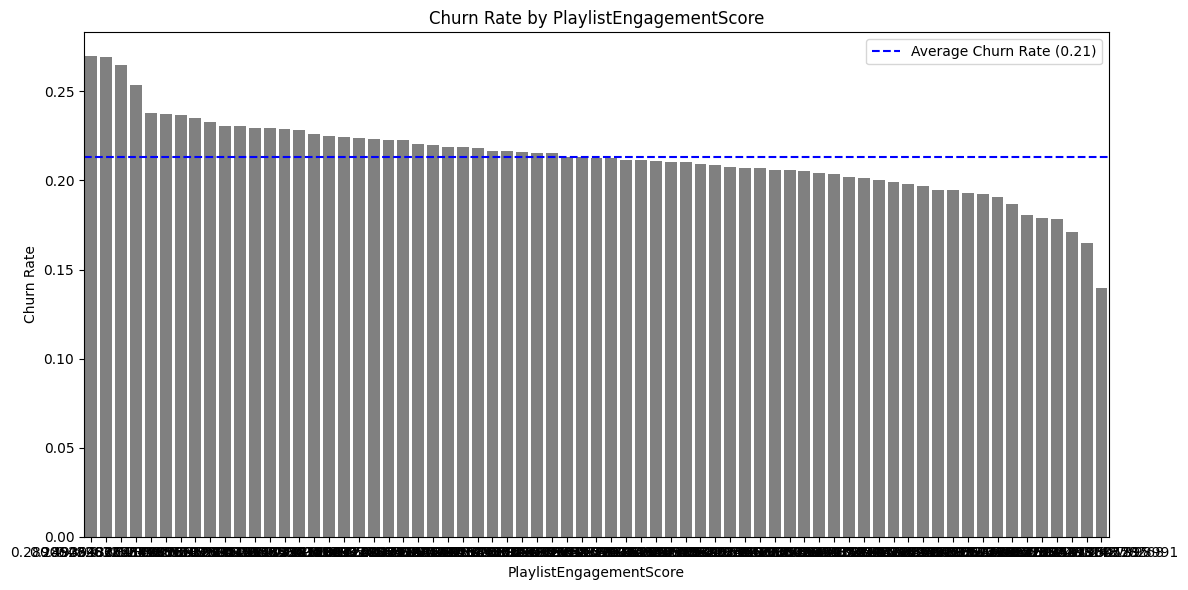

In [22]:
# Creating new feature: Playlist Engagement Score
plotting_df['PlaylistEngagementScore'] = plotting_df['num_shared_playlists'] / (plotting_df['num_playlists_created'] + 1)  # +1 to avoid division by 0
plotting_df['PlaylistEngagementScore'] = plotting_df['PlaylistEngagementScore'].fillna(0)  # Fills NaN with 0

plot_new_feature(df=plotting_df, new_feature_name='PlaylistEngagementScore')


In [23]:
import pandas as pd

def categorize_playlist_engagement(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # Ensure Playlist Engagement Score is numeric, handling missing values
    df["PlaylistEngagementScore"] = pd.to_numeric(df["PlaylistEngagementScore"], errors='coerce')

    # Fill missing values with "Missing Score"
    df['PlaylistEngagement'] = df["PlaylistEngagementScore"].fillna("Missing Score")

    # Define function to categorize Playlist Engagement Score
    def categorize(score):
        if isinstance(score, str):  # Handles cases where it's 'Missing Score'
            return score
        elif score < 0.2:
            return 'Low'
        elif 0.2 <= score <= 0.5:
            return 'Moderate'
        else:
            return 'High'

    # Apply categorization function
    df['PlaylistEngagementCategory'] = df['PlaylistEngagement'].apply(categorize)

    return df

# Apply the function to the dataset
plotting_df = categorize_playlist_engagement(plotting_df)



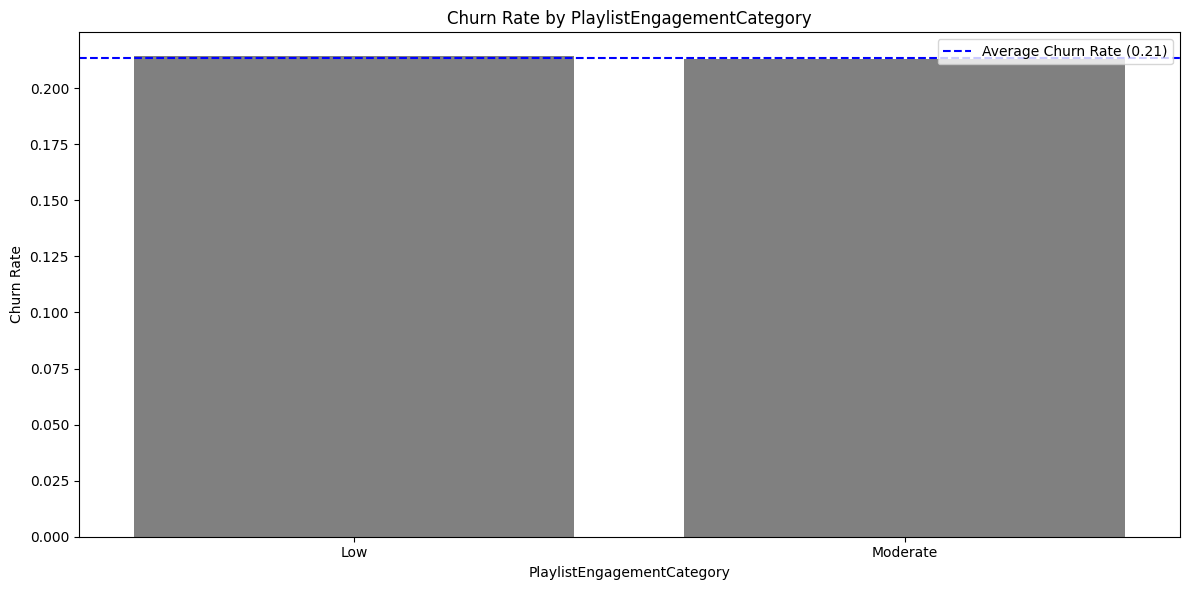

In [24]:
plot_new_feature(df = plotting_df,
                 new_feature_name = 'PlaylistEngagementCategory')

In [25]:
import pandas as pd

def create_playlist_engagement_score(df: pd.DataFrame) -> pd.DataFrame:
    """Creates the Playlist Engagement Score feature."""
    df = df.copy()
    if 'num_playlists_created' in df.columns and 'num_shared_playlists' in df.columns:
        df["PlaylistEngagementScore"] = df["num_shared_playlists"] / (df["num_playlists_created"] + 1)  # Avoid division by 0
        df["PlaylistEngagementScore"] = df["PlaylistEngagementScore"].fillna(0)  # Fill missing values with 0
    else:
        print("Error: 'num_playlists_created' or 'num_shared_playlists' columns not found in dataframe.")
    return df

def categorize_playlist_engagement(df: pd.DataFrame) -> pd.DataFrame:
    """Categorizes Playlist Engagement Score into Low, Moderate, and High."""
    df = df.copy()
    
    if 'PlaylistEngagementScore' in df.columns:
        # Ensure Playlist Engagement Score is numeric
        df["PlaylistEngagementScore"] = pd.to_numeric(df["PlaylistEngagementScore"], errors="coerce")

        # Define function to categorize
        def categorize(score):
            if pd.isna(score):
                return "Missing Score"
            elif score < 0.2:
                return "Low"
            elif 0.2 <= score <= 0.5:
                return "Moderate"
            else:
                return "High"

        df["PlaylistEngagementCategory"] = df["PlaylistEngagementScore"].apply(categorize)
    else:
        print("Error: 'PlaylistEngagementScore' column not found in dataframe.")
    
    return df

def feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    """Applies all feature engineering steps to the dataset."""
    new_df = df.copy()
    
    # Apply transformations
    new_df = create_playlist_engagement_score(new_df)  # Ensure feature exists
    new_df = categorize_playlist_engagement(new_df)  # Then categorize it
    
    return new_df

# Run feature engineering
training_data_new = feature_engineering(df = training_data)

# Check sample
print(training_data_new[["PlaylistEngagementScore", "PlaylistEngagementCategory"]].sample(5))


       PlaylistEngagementScore PlaylistEngagementCategory
3096                  0.114585                        Low
23696                 0.258067                   Moderate
1036                  0.490523                   Moderate
9440                  0.297990                   Moderate
22142                 0.217625                   Moderate


**7. Feature Selection (Filtering Method)**

In [26]:
training_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41000 entries, 0 to 40999
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               41000 non-null  int64  
 1   weekly_hours                      41000 non-null  float64
 2   average_session_length            41000 non-null  float64
 3   song_skip_rate                    41000 non-null  float64
 4   weekly_songs_played               41000 non-null  float64
 5   weekly_unique_songs               41000 non-null  float64
 6   num_favorite_artists              41000 non-null  float64
 7   num_platform_friends              41000 non-null  float64
 8   num_playlists_created             41000 non-null  float64
 9   num_shared_playlists              41000 non-null  float64
 10  notifications_clicked             41000 non-null  float64
 11  churned                           41000 non-null  int64  
 12  subs

In [27]:
training_data_new.select_dtypes(include=['int64', 'float64']).columns.tolist()

['age',
 'weekly_hours',
 'average_session_length',
 'song_skip_rate',
 'weekly_songs_played',
 'weekly_unique_songs',
 'num_favorite_artists',
 'num_platform_friends',
 'num_playlists_created',
 'num_shared_playlists',
 'notifications_clicked',
 'churned',
 'PlaylistEngagementScore']

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


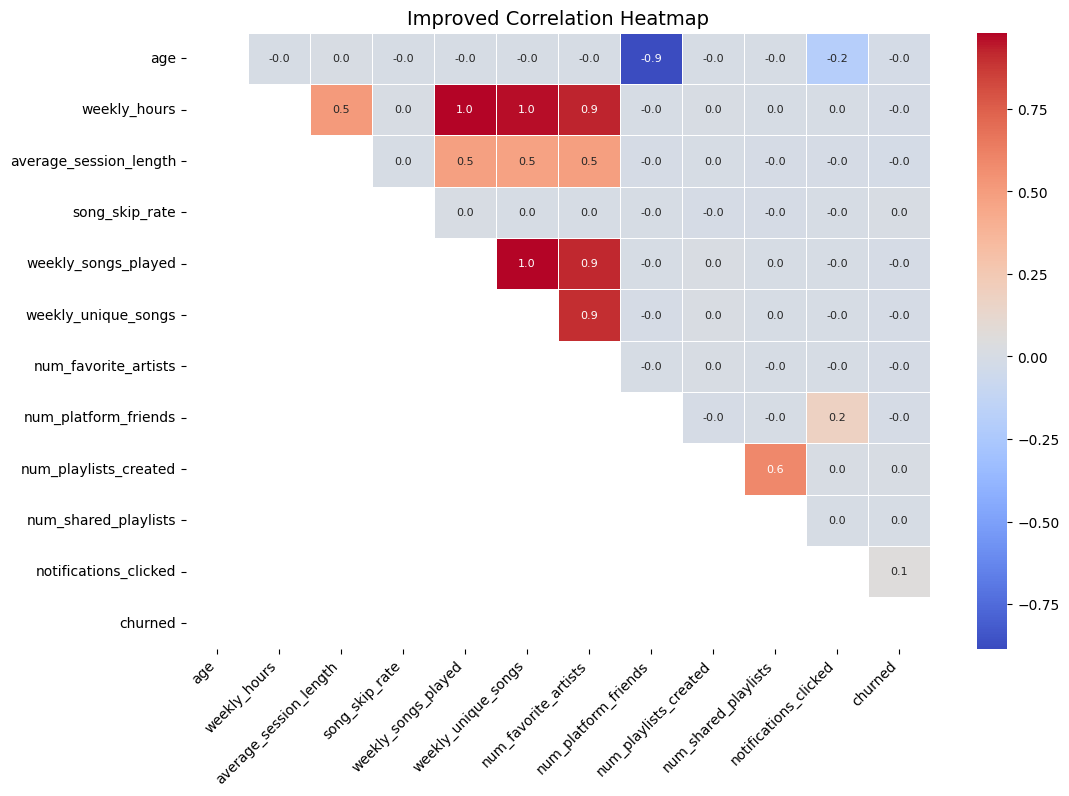

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features
numeric_features = training_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute correlation matrix
corr_matrix = training_data[numeric_features].corr()

# Handle NaN and infinite values
corr_matrix = corr_matrix.replace([np.inf, -np.inf], np.nan).fillna(0)

# Create the upper triangle mask
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Increase figure size
sns.heatmap(upper_triangle, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5, annot_kws={"size": 8})
plt.xticks(rotation=45, ha="right")  # Rotate X labels for better visibility
plt.yticks(rotation=0)  # Keep Y labels readable
plt.title('Improved Correlation Heatmap', fontsize=14)
plt.show()

In [29]:
# Adjust the list of numeric features based on available columns
numeric_features = [
    'age', 'weekly_hours', 'average_session_length', 'song_skip_rate', 'weekly_songs_played',
    'weekly_unique_songs', 'num_favorite_artists', 'num_platform_friends', 'num_playlists_created',
    'num_shared_playlists', 'notifications_clicked', 'PlaylistEngagementScore'
]

# Specify nominal features based on your data
nominal_features = [
    'churned'  # 'churned' is treated as the target variable in binary classification
]

# You don't seem to have explicit ordinal features in your dataset. If needed, you can categorize other features later.

# Combine all selected features
all_features = numeric_features + nominal_features



**8. Spliting data into training and testing**

In [30]:
from sklearn.model_selection import train_test_split

# Prepare features (X) and target variable (y)
X = training_data_new[all_features]
y = training_data_new['churned']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Size of training set: {len(X_train)}")
print(f"Size of testing set: {len(X_test)}")

Size of training set: 28700
Size of testing set: 12300


**9. Building Pipeline**

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Define numeric features
numeric_features = [
    'age', 'weekly_hours', 'average_session_length', 'song_skip_rate', 
    'weekly_songs_played', 'weekly_unique_songs', 'num_favorite_artists', 
    'num_platform_friends', 'num_playlists_created', 'num_shared_playlists', 
    'notifications_clicked', 'PlaylistEngagementScore'
]

# Split the data
X = training_data_new[numeric_features]
y = training_data_new['churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Apply transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'weekly_hours',
                                  'average_session_length', 'song_skip_rate',
                                  'weekly_songs_played', 'weekly_unique_songs',
                                  'num_favorite_artists',
                                  'num_platform_friends',
                                  'num_playlists_created',
                                  'num_shared_playlists',
                                  'notifications_clicked',
                                  'PlaylistEngagementScore'])])

In [32]:
# Train Random Forest Classifier
random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        n_estimators=300,   # Increased trees
        max_depth=10,       # Deeper trees
        min_samples_split=5,  
        min_samples_leaf=3, 
        class_weight=None  # Removed 'balanced' since SMOTE is used
    ))
])


random_forest_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'weekly_hours',
                                                   'average_session_length',
                                                   'song_skip_rate',
                                                   'weekly_songs_played',
                                                   'weekly_unique_songs',
                                                   'num_favorite_artists',
                                                   'num_platform_friends',
                                                   'num_playlists_created',
                                                   'num_shared_playlists',
                                                   'notifications_clicked',
                                                   'PlaylistEngagementScore'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=3,
                                        min_samples_split=5, n_estimators=300,
                                        random_state=42))])

In [33]:
# Fit model
random_forest_model.fit(X_train_sm, y_train_sm)

# Predictions
y_pred = random_forest_model.predict(X_test)

# Model evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6675
Precision: 0.2338
Recall: 0.2454
F1-Score: 0.2395
AUC-ROC: 0.5137

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79      9676
           1       0.23      0.25      0.24      2624

    accuracy                           0.67     12300
   macro avg       0.51      0.51      0.51     12300
weighted avg       0.67      0.67      0.67     12300



In [34]:
# Ensure predictions are in the correct format
random_forest_predictions = random_forest_model.predict(X_test)

# Convert predictions to a Pandas Series to check value counts
prediction_counts = pd.Series(random_forest_predictions).value_counts()
print("Value Counts of Predictions:")
print(prediction_counts)

Value Counts of Predictions:
0    9546
1    2754
Name: count, dtype: int64


In [35]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


# Define numeric features (remove any missing ones)
numeric_features = [
    'age', 'weekly_hours', 'average_session_length', 'song_skip_rate', 
    'weekly_songs_played', 'weekly_unique_songs', 'num_favorite_artists', 
    'num_platform_friends', 'num_playlists_created', 'num_shared_playlists', 
    'notifications_clicked'
]

# Ensure only existing columns are used
numeric_features = [col for col in numeric_features if col in training_data.columns]

# Define the target variable
target_variable = 'churned'

# Prepare features (X) and target (y)
X = training_data[numeric_features]
y = training_data[target_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize the data
])

# Apply transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])
preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'weekly_hours',
                                  'average_session_length', 'song_skip_rate',
                                  'weekly_songs_played', 'weekly_unique_songs',
                                  'num_favorite_artists',
                                  'num_platform_friends',
                                  'num_playlists_created',
                                  'num_shared_playlists',
                                  'notifications_clicked'])])

In [36]:
# Build the Decision Tree pipeline
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        random_state=42,
        max_depth=10,       # Limit depth to prevent overfitting
        min_samples_split=5,  
        min_samples_leaf=3, 
        class_weight='balanced'  # Adjusts for class imbalance
    ))
])
decision_tree_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'weekly_hours',
                                                   'average_session_length',
                                                   'song_skip_rate',
                                                   'weekly_songs_played',
                                                   'weekly_unique_songs',
                                                   'num_favorite_artists',
                                                   'num_platform_friends',
                                                   'num_playlists_created',
                                                   'num_shared_playlists',
                                                   'notifications_clicked'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=3, min_samples_split=5,
                                        random_state=42))])

In [37]:
# Train the model
decision_tree_pipeline.fit(X_train, y_train)

# Make predictions on test data
y_pred = decision_tree_pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5698
Precision: 0.2468
Recall: 0.4954
F1-Score: 0.3294
AUC-ROC: 0.5427

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.59      0.68      9676
           1       0.25      0.50      0.33      2624

    accuracy                           0.57     12300
   macro avg       0.53      0.54      0.51     12300
weighted avg       0.69      0.57      0.61     12300



In [38]:
# Check distribution of predictions
prediction_counts = pd.Series(y_pred).value_counts()
print("Value Counts of Predictions:")
print(prediction_counts)

Value Counts of Predictions:
0    7032
1    5268
Name: count, dtype: int64


In [39]:
testing_data_new = feature_engineering(df = testing_data)
testing_data_new.sample(5)

,customer_id,age,location,subscription_type,payment_plan,num_subscription_pauses,payment_method,customer_service_inquiries,signup_date,weekly_hours,...,song_skip_rate,weekly_songs_played,weekly_unique_songs,num_favorite_artists,num_platform_friends,num_playlists_created,num_shared_playlists,notifications_clicked,PlaylistEngagementScore,PlaylistEngagementCategory
5745,46746,21,Washington,student,annual,annual,debit,few,3/11/2017,0.495789,...,0.93,7,5,7,102,12,3,112,0.230769,Moderate
5997,46998,73,North Dakota,basic,annual,annual,credit,none,7/10/2017,11.900286,...,0.90,143,116,18,46,15,4,254,0.250000,Moderate
5576,46577,52,South Carolina,family premium,monthly,annual,debit,many,12/29/2016,10.731195,...,0.11,139,98,18,69,19,5,0,0.250000,Moderate
6700,47701,27,North Dakota,premium,annual,monthly,credit,many,4/24/2018,22.245118,...,0.69,398,273,43,100,15,8,109,0.500000,Moderate
135,41136,74,Maine,family premium,monthly,monthly,debit,none,8/9/2018,1.904998,...,0.28,26,15,5,50,7,2,2,0.250000,Moderate


In [40]:
# Make predictions on the test dataset
test_predictions = random_forest_model.predict(testing_data_new)

# Prepare submission file without 'id'
submission = pd.DataFrame({"customer_id" : testing_data_new["customer_id"],"churned": test_predictions})

# Save submission file
submission.to_csv("submission.csv", index=False)

# Verify if the file is saved correctly
import os
if "submission.csv" in os.listdir():
    print("submission.csv saved successfully!")
else:
    print("Error: submission.csv was not found.")

submission.csv saved successfully!


In [41]:
submission['churned'].value_counts()

churned
0    9994
1       5
Name: count, dtype: int64

In [42]:
# Make predictions on the test dataset
test_predictions = decision_tree_pipeline.predict(testing_data_new)

# Prepare submission file without 'id'
submission = pd.DataFrame({"customer_id": testing_data_new["customer_id"], "churned": test_predictions})

# Save submission file
submission.to_csv("submission.csv", index=False)

# Verify if the file is saved correctly
if "submission.csv" in os.listdir():
    print("submission.csv saved successfully!")
else:
    print("Error: submission.csv was not found.")

submission.csv saved successfully!


In [43]:
submission['churned'].value_counts()

churned
0    9856
1     143
Name: count, dtype: int64

In [44]:
submission.head()

,customer_id,churned
0,41001,0
1,41002,0
2,41003,0
3,41004,0
4,41005,0


1) What were the main steps you took to prepare the data?

Answer:

First, I examined the dataset and handled any missing values by either imputing or removing rows with missing data. Then, I preprocessed the features, ensuring categorical variables were encoded properly using one-hot encoding, and numerical variables were scaled where necessary. I created additional features to enhance the model’s predictive power. This included deriving a few new features based on existing ones.
After preprocessing, I split the dataset into training and testing sets to evaluate the performance of the model.

2) What models did you try, and why did you choose the final model?

Answer:

Initially, I experimented with several classification models, such as Logistic Regression,Decision Tree, XGB, and Random Forest. I chose the Random Forest model as the final model due to its ability to handle complex, non-linear relationships between features and its robustness to overfitting.
Additionally, Random Forest allows me to assess feature importance, which was an important part of my analysis.

3) How did you evaluate the performance of your model?

Answer:

I evaluated the model’s performance on the training data and later on testing data, ensuring it was robust and generalized well to unseen data. For performance metrics, I primarily relied on accuracy, precision, recall, and F1 score, depending on the classification problem.
